In [58]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Activation, Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import metrics
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import cv2
import random
import requests

In [76]:
DIR = 'D:\Datasets\Pokemon\PokemonData'


In [77]:
# def list_files(dir):
#     r = []
#     for root, dirs in os.walk(dir):
#         r.append(os.path.join(root, dirs))
#     return r

In [82]:
poke_names = []
for root, subdirectories, files in os.walk(DIR):
    #print(subdirectories)
    poke_names.append(subdirectories)

poke_names_alpha = poke_names[0]
print(poke_names_alpha)
print(len(poke_names_alpha))


['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Nidoqueen', 'Nidorina'

In [4]:
#There are 149 names. Let us add numbers to them.

In [5]:
poke_numbers = []

for i in range(0,149):
    poke_numbers.append(i)

poke_dictionary = dict(zip(poke_names_alpha, poke_numbers))

print(poke_dictionary)

{'Abra': 0, 'Aerodactyl': 1, 'Alakazam': 2, 'Arbok': 3, 'Arcanine': 4, 'Articuno': 5, 'Beedrill': 6, 'Bellsprout': 7, 'Blastoise': 8, 'Bulbasaur': 9, 'Butterfree': 10, 'Caterpie': 11, 'Chansey': 12, 'Charizard': 13, 'Charmander': 14, 'Charmeleon': 15, 'Clefable': 16, 'Clefairy': 17, 'Cloyster': 18, 'Cubone': 19, 'Dewgong': 20, 'Diglett': 21, 'Ditto': 22, 'Dodrio': 23, 'Doduo': 24, 'Dragonair': 25, 'Dragonite': 26, 'Dratini': 27, 'Drowzee': 28, 'Dugtrio': 29, 'Eevee': 30, 'Ekans': 31, 'Electabuzz': 32, 'Electrode': 33, 'Exeggcute': 34, 'Exeggutor': 35, 'Farfetchd': 36, 'Fearow': 37, 'Flareon': 38, 'Gastly': 39, 'Gengar': 40, 'Geodude': 41, 'Gloom': 42, 'Golbat': 43, 'Goldeen': 44, 'Golduck': 45, 'Golem': 46, 'Graveler': 47, 'Grimer': 48, 'Growlithe': 49, 'Gyarados': 50, 'Haunter': 51, 'Hitmonchan': 52, 'Hitmonlee': 53, 'Horsea': 54, 'Hypno': 55, 'Ivysaur': 56, 'Jigglypuff': 57, 'Jolteon': 58, 'Jynx': 59, 'Kabuto': 60, 'Kabutops': 61, 'Kadabra': 62, 'Kakuna': 63, 'Kangaskhan': 64, 'Kingl

In [6]:
CATEGORIES = poke_names_alpha

In [33]:
training_data = []
# count_e = 0


def create_training_data():
    count_e = 0
    for category in CATEGORIES: 
        path = os.path.join(DIR, category) #gets the path for all 150 folders
        class_num = CATEGORIES.index(category) #the class is the index of whatever category is in CATEGORY
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_img_array = cv2.resize(img_array, (120, 120))
                training_data.append([new_img_array, class_num])
            
            except Exception as e:
                count_e+=1
    print(count_e)
            
create_training_data() 


28


In [34]:
print(len(training_data))

10665


In [35]:
#There were a total of 14985 images. The ones not created as images had broken sizes.

In [36]:
print(training_data[0])

[array([[[139, 119, 251],
        [144, 123, 249],
        [156, 132, 249],
        ...,
        [205, 137, 251],
        [204, 135, 250],
        [203, 134, 249]],

       [[137, 122, 251],
        [141, 125, 250],
        [154, 135, 250],
        ...,
        [202, 139, 253],
        [203, 138, 254],
        [202, 137, 253]],

       [[133, 125, 254],
        [138, 129, 252],
        [151, 138, 252],
        ...,
        [197, 138, 251],
        [196, 137, 252],
        [195, 136, 251]],

       ...,

       [[199, 168, 247],
        [212, 184, 250],
        [233, 209, 254],
        ...,
        [134, 114, 253],
        [125, 107, 250],
        [120, 102, 245]],

       [[203, 173, 248],
        [220, 192, 253],
        [233, 208, 251],
        ...,
        [132, 114, 255],
        [128, 111, 253],
        [126, 110, 252]],

       [[200, 169, 245],
        [219, 189, 251],
        [230, 204, 247],
        ...,
        [131, 112, 254],
        [128, 110, 255],
        [126, 108, 254]

In [37]:
#This is what one instance looks like.

In [38]:
random.seed(42)
random.shuffle(training_data) #all the pokemon are in order as of now

In [39]:
#training_data_nparray = np.array(training_data).reshape(-1, 224,224, 3)

In [40]:
X = []
y = []

for features, labels in training_data:
        X.append(features)
        y.append(labels)
        
X = np.array(X).reshape(-1, 120, 120, 3)     

X = X/225.0

In [41]:
y = np.asarray(y)

In [17]:
# np.save('features.npy', X)
# np.save('labels.npy', y) 
#The features and labels have been saved once, commented out to prevent overwriting.

In [18]:
#Let us see what an image looks like in the dataset. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


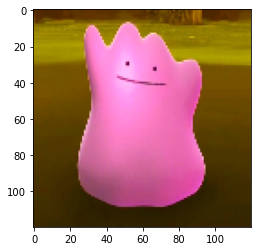

In [42]:
testImage = X[0]
fig = plt.figure
plt.imshow(testImage, cmap='gray_r')
plt.show()

In [57]:
#Let us now see a collection of these images with their labels to verify.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<function matplotlib.pyplot.show(close=None, block=None)>

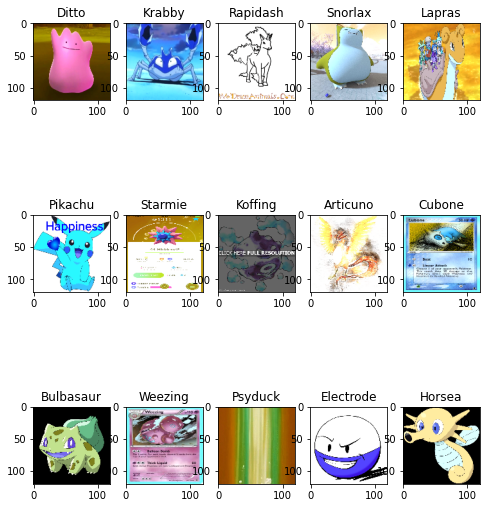

In [43]:
testImages = X[:15]
labels = y[:15]
rows = 3
col = 5
fig, axes = plt.subplots(rows, col, figsize =(8,10))

for i in range(15):
    ax = axes[i//col, i%col]
    ax.imshow(testImages[i], cmap='gray_r')
    ax.set_title((poke_names_alpha[labels[i]]))
plt.show

In [21]:
#we can confirm that the labels match the pokemon

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 42)

In [45]:
print(len(X_train))

8532


In [50]:
# model creation

# model = Sequential()
# model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))

# model.add(Dense(149))
# model.add(Activation('sigmoid'))

model = Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape =X_train.shape[1:], kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(149, activation = 'softmax'))

checkpoint = ModelCheckpoint('../working/best_model.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)             #change directory
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 64), epochs = 200, validation_data = (X_test, y_test),
                             steps_per_epoch=len(X_train) // 64, callbacks = [checkpoint])

C:\Users\varun\AppData\Local\Temp/ipykernel_36296/4225476740.py:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 64), epochs = 200, validation_data = (X_test, y_test),


Epoch 1/200
133/133 [==============================] - ETA: 0s - loss: 5.4684 - accuracy: 0.0407
Epoch 1: val_accuracy improved from -inf to 0.08345, saving model to ../working\best_model.hdf5
133/133 [==============================] - 29s 194ms/step - loss: 5.4684 - accuracy: 0.0407 - val_loss: 4.8254 - val_accuracy: 0.0835
Epoch 2/200
133/133 [==============================] - ETA: 0s - loss: 4.7406 - accuracy: 0.0825
Epoch 2: val_accuracy did not improve from 0.08345
133/133 [==============================] - 19s 144ms/step - loss: 4.7406 - accuracy: 0.0825 - val_loss: 4.8087 - val_accuracy: 0.0816
Epoch 3/200
133/133 [==============================] - ETA: 0s - loss: 4.3431 - accuracy: 0.1095
Epoch 3: val_accuracy improved from 0.08345 to 0.12049, saving model to ../working\best_model.hdf5
133/133 [==============================] - 19s 144ms/step - loss: 4.3431 - accuracy: 0.1095 - val_loss: 4.2582 - val_accuracy: 0.1205
Epoch 4/200
133/133 [==============================] - ETA: 0

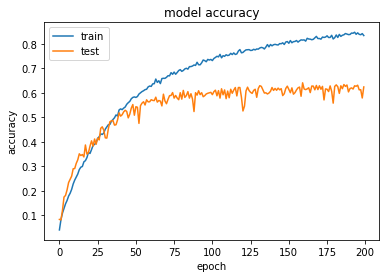

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [158]:
#We can see that the validation accuracy starts to plateau around the 100th epoch, 
#indicating that overfitting is occuring. The best validation accuracy is at epoch 160